In [15]:
import sys
import os

In [16]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-2 path
ass_path=sys.path[-2]

print(ass_path)

/home/sdi1700187/MLCBAss2/Assignment-2


In [17]:
%load_ext autoreload
%autoreload 2

from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
df=pd.read_csv('../data/dev_breast_cancer.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
from pathlib import Path

my_file = Path("../data/rncv_summary_results.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/dev_breast_cancer.csv')

[I 2025-05-05 12:55:34,983] A new study created in memory with name: Winner:LogisticRegression


The winner method is LogisticRegression with 9/9 metrics
 ALL HAIL THE KING!


[I 2025-05-05 12:55:37,275] Trial 0 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.003832655576761383, 'l1_ratio': 0.9360789071536637}. Best is trial 0 with value: 0.5.
[I 2025-05-05 12:55:39,503] Trial 1 finished with value: 0.9181355945604048 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0221926479975442, 'l1_ratio': 0.6665188407341999}. Best is trial 1 with value: 0.9181355945604048.
[I 2025-05-05 12:55:41,770] Trial 2 finished with value: 0.968714421252372 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.17358186923539828, 'l1_ratio': 0.5124524626406723}. Best is trial 2 with value: 0.968714421252372.
[I 2025-05-05 12:55:44,339] Trial 3 finished with value: 0.9201355945604048 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.021851123580946714, 'l1_ratio': 0.8101036724227114}. Best is trial 2 with value: 0.968714421252372.
[I 2025-05-05 12:55:46,610] Trial 4 finished with value: 0.9337345825426946 and para

EARLY STOPPING: No improvement after 10 trials!
--> Best trial is 16 with value: 0.978089421252372 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.44026347369694363, 'l1_ratio': 0.7754814369106016}

For model LogisticRegression the best parameters are {'penalty': 'l1', 'solver': 'saga', 'C': 0.44026347369694363, 'l1_ratio': 0.7754814369106016}
Bootstrapped 95% CIs (Model trained on dev, tested on val):
Balanced Accuracy: [0.8850, 0.9868]
F1 Score       : [0.8525, 0.9846]
Precision      : [0.8484, 1.0000]
Recall         : [0.8065, 1.0000]
MCC            : [0.7864, 0.9778]
ROC AUC        : [0.9504, 0.9974]
PR AUC         : [0.9256, 0.9950]
Specificity         : 0.9706
NPV                 : 0.9565


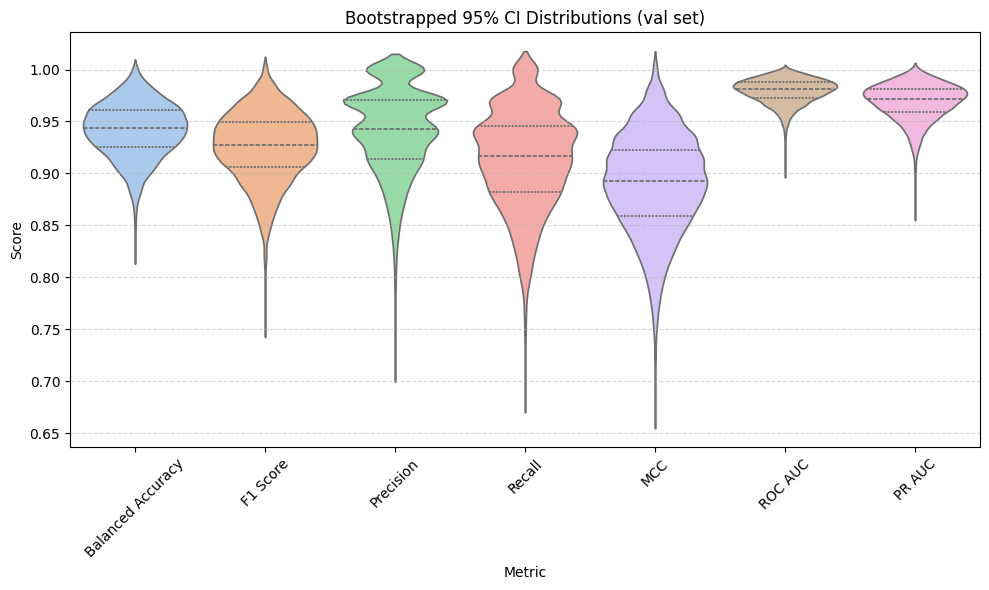

[I 2025-05-05 13:00:29,714] A new study created in memory with name: Winner:LogisticRegression
[I 2025-05-05 13:00:32,055] Trial 0 finished with value: 0.9508021255060729 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.03676095227389113, 'l1_ratio': 0.9514486705761025}. Best is trial 0 with value: 0.9508021255060729.
[I 2025-05-05 13:00:34,238] Trial 1 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0038304964217771398, 'l1_ratio': 0.3972425285731691}. Best is trial 0 with value: 0.9508021255060729.
[I 2025-05-05 13:00:36,473] Trial 2 finished with value: 0.7984480431848853 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.007593361149757511, 'l1_ratio': 0.7327539740979072}. Best is trial 0 with value: 0.9508021255060729.
[I 2025-05-05 13:00:38,686] Trial 3 finished with value: 0.9649856612685559 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.01654542585570483, 'l1_ratio': 0.9127600223565219}. Best is trial 3 w

EARLY STOPPING: No improvement after 10 trials!
--> Best trial is 11 with value: 0.9716523279352227 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.4254412522352824, 'l1_ratio': 0.11024747249769024}

For model LogisticRegression the best parameters are {'penalty': 'l2', 'solver': 'saga', 'C': 0.4254412522352824, 'l1_ratio': 0.11024747249769024}


In [20]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_summary_results.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")


winner=get_winner(summary=results_df)

print(f"The winner method is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

df_dev=pd.read_csv('../data/dev_breast_cancer.csv')
df_complete=pd.read_csv('../data/breast_cancer.csv')
df_val=pd.read_csv('../data/val_clean_breast_cancer.csv')

tuned_winner_dev=winner_tuning(df=df_dev,winner=winner[0])

# bootstrap_model_plot(df_dev=df_dev,df_val=df_val,model=tuned_winner_dev)
bootstrap_model(df_dev=df_dev,df_val=df_val,model=tuned_winner_dev)

tuned_winner_complete=winner_tuning(df=df_complete,winner=winner[0])

In [21]:
save_winner(winner=tuned_winner_complete)